In [105]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [106]:
CSV_PATH = r"F:\AI ML\Star Classification\star_classification.csv" 
assert os.path.exists(CSV_PATH), f"File not found: {CSV_PATH}"
df = pd.read_csv(CSV_PATH)

In [107]:
df.head(3)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299


In [108]:
df.shape

(100000, 18)

In [109]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [111]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [112]:
df = df.dropna().reset_index(drop=True)

In [113]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [114]:
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
label_names = list(le.classes_)

{'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [116]:
df.median(numeric_only=True)

obj_ID           1.237663e+18
alpha            1.809007e+02
delta            2.364592e+01
u                2.217914e+01
g                2.109983e+01
r                2.012529e+01
i                1.940514e+01
z                1.900460e+01
run_ID           4.188000e+03
rerun_ID         3.010000e+02
cam_col          4.000000e+00
field_ID         1.460000e+02
spec_obj_ID      5.614883e+18
redshift         4.241733e-01
plate            4.987000e+03
MJD              5.586850e+04
fiber_ID         4.330000e+02
class_encoded    0.000000e+00
dtype: float64

In [117]:
df.mean(numeric_only=True)

obj_ID           1.237665e+18
alpha            1.776291e+02
delta            2.413530e+01
u                2.198047e+01
g                2.053139e+01
r                1.964576e+01
i                1.908485e+01
z                1.866881e+01
run_ID           4.481366e+03
rerun_ID         3.010000e+02
cam_col          3.511610e+00
field_ID         1.861305e+02
spec_obj_ID      5.783882e+18
redshift         5.766608e-01
plate            5.137010e+03
MJD              5.558865e+04
fiber_ID         4.493127e+02
class_encoded    6.214900e-01
dtype: float64

In [118]:
df.median(numeric_only=True)

obj_ID           1.237663e+18
alpha            1.809007e+02
delta            2.364592e+01
u                2.217914e+01
g                2.109983e+01
r                2.012529e+01
i                1.940514e+01
z                1.900460e+01
run_ID           4.188000e+03
rerun_ID         3.010000e+02
cam_col          4.000000e+00
field_ID         1.460000e+02
spec_obj_ID      5.614883e+18
redshift         4.241733e-01
plate            4.987000e+03
MJD              5.586850e+04
fiber_ID         4.330000e+02
class_encoded    0.000000e+00
dtype: float64

In [119]:
df.std(numeric_only=True)

obj_ID           8.438560e+12
alpha            9.650224e+01
delta            1.964467e+01
u                3.176929e+01
g                3.175029e+01
r                1.854760e+00
i                1.757895e+00
z                3.172815e+01
run_ID           1.964765e+03
rerun_ID         0.000000e+00
cam_col          1.586912e+00
field_ID         1.490111e+02
spec_obj_ID      3.324016e+18
redshift         7.307073e-01
plate            2.952303e+03
MJD              1.808484e+03
fiber_ID         2.724984e+02
class_encoded    8.167783e-01
dtype: float64

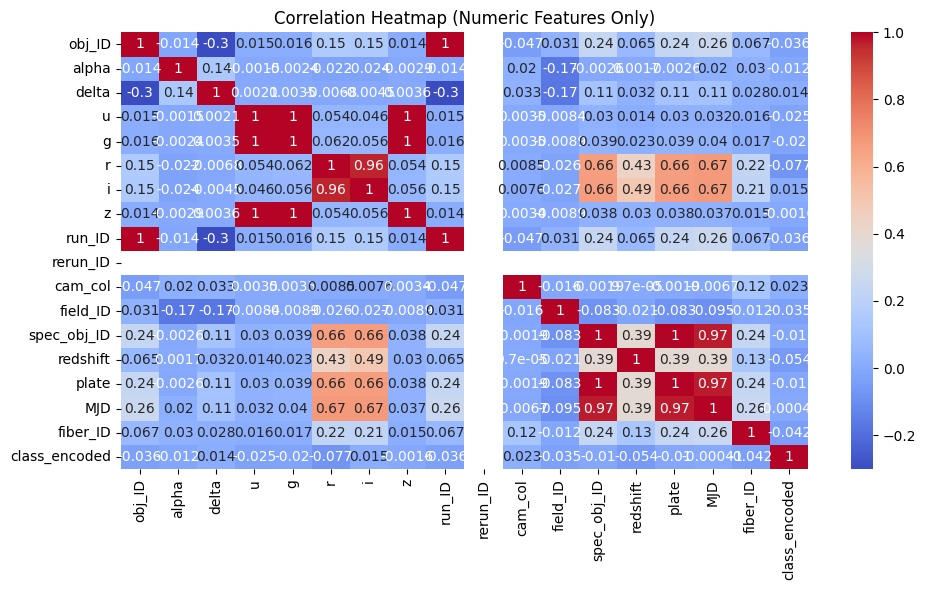

In [120]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

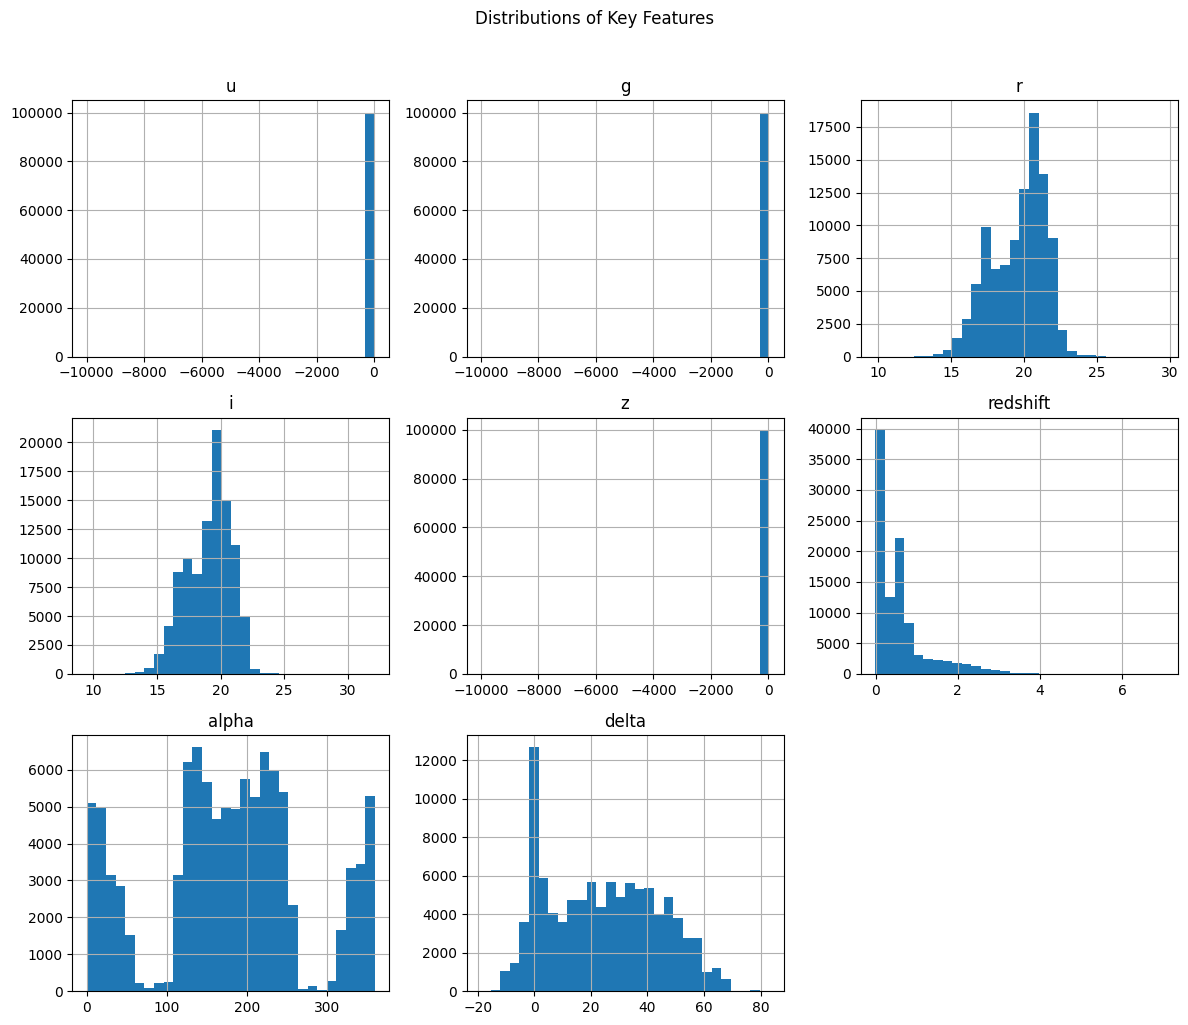

In [121]:
num_cols = [c for c in ['u','g','r','i','z','redshift','alpha','delta'] if c in df.columns]
if num_cols:
    df[num_cols].hist(figsize=(12,10), bins=30)
    plt.suptitle("Distributions of Key Features", y=1.02)
    plt.tight_layout()
    plt.show()

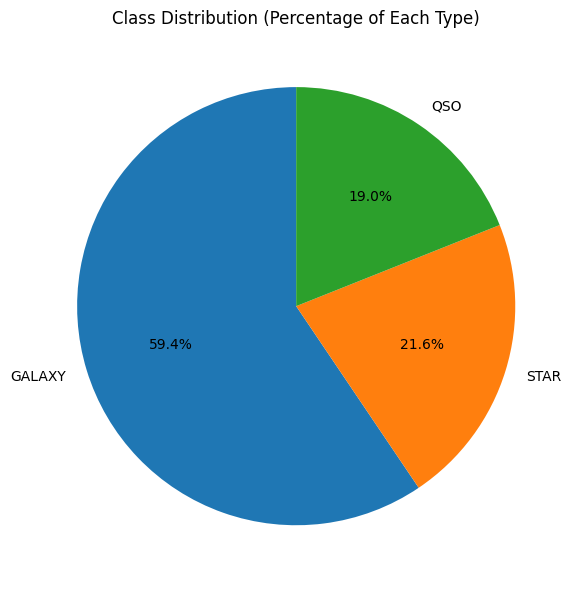

In [130]:
class_counts = df['class'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'], startangle=90)
plt.title("Class Distribution (Percentage of Each Type)")
plt.tight_layout()
plt.show()

In [123]:
# Use minimal, strong features (7–8)
feature_cols = [c for c in ['u','g','r','i','z','redshift','alpha','delta'] if c in df.columns]
X = df[feature_cols].copy()
y = df['class_encoded'].copy()

In [124]:
# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTrain:", X_train.shape, "Test:", X_test.shape)


Train: (80000, 8) Test: (20000, 8)


In [125]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=250, random_state=42),
}

results = {}
reports = {}
pred_store = {}

In [ ]:
for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    pred_store[name] = preds

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    mse  = mean_squared_error(y_test, preds)
    r2   = r2_score(y_test, preds)

    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "Mean Square Error": mse, "R^2 Score": r2}
    reports[name] = classification_report(y_test, preds, target_names=label_names, zero_division=0)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\hp\AppData\Local\Temp\ipykernel_3800\2260068912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=res_df.index, y=res_df["Accuracy"], palette='viridis')


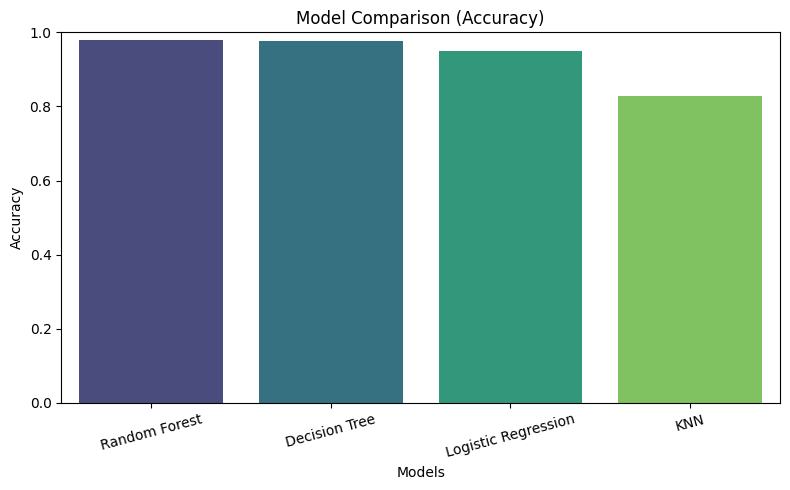


Full results table:
                      Accuracy  Precision   Recall        F1  \
Random Forest         0.97940   0.979305  0.97940  0.979261   
Decision Tree         0.97550   0.975370  0.97550  0.975312   
Logistic Regression   0.95095   0.951138  0.95095  0.950575   
KNN                   0.82770   0.824901  0.82770  0.818170   

                     Mean Square Error  R^2 Score  
Random Forest                  0.02420   0.963726  
Decision Tree                  0.02750   0.958779  
Logistic Regression            0.09555   0.856776  
KNN                            0.49945   0.251354  


In [127]:
res_df = pd.DataFrame(results).T.sort_values("Accuracy", ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=res_df.index, y=res_df["Accuracy"], palette='viridis')
plt.xticks(rotation=15)
plt.ylim(0,1)
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.tight_layout()
plt.show()
print("\nFull results table:\n", res_df)

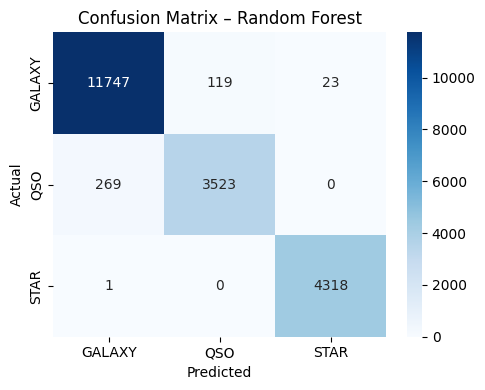

In [128]:
# ---------- 8) Confusion matrix for best model ----------
cm = confusion_matrix(y_test, pred_store[res_df.index[0]])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title(f'Confusion Matrix – {res_df.index[0]}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

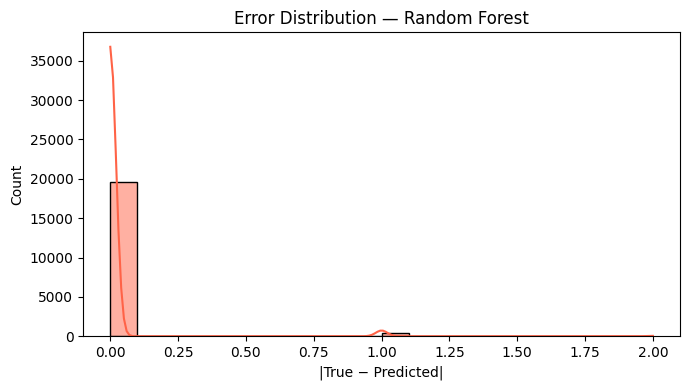

In [129]:
errors = np.abs(y_test - rf_pred)
plt.figure(figsize=(7,4))
sns.histplot(errors, bins=20, kde=True, color='tomato')
plt.title("Error Distribution — Random Forest")
plt.xlabel("|True − Predicted|")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)